In [1]:
import numpy as np
import matplotlib.pyplot as plt
import ot

from Core_Functions import simple as sp
from Core_Functions import gmm_base as gb

In [2]:
#start with simple case of Gaussian passing over each other

m_points = sp.Model_Points(np.linspace(-5,5,100).reshape([100,1]))
post = gb.Gaussian_Mixture(np.array([1]),np.array([0]).reshape([1,1]),np.array([1]).reshape([1,1,1]))

post_eval = sp.Evaluate_Mixture(post,m_points)

#now want to test each misfit for mean ranging from -5 to 5
L2 = np.zeros(21)
W2 = np.zeros(21)
mu_arr = np.linspace(-5,5,21)

k = 0
for mu in mu_arr:
    test_mix = gb.Gaussian_Mixture(np.array([1]),np.array([mu]).reshape([1,1]),np.array([1]).reshape([1,1,1]))
    test_eval = sp.Evaluate_Mixture(test_mix,m_points)
    
    s = np.log(post_eval) - np.log(test_eval)
    r = s - np.mean(s)
    L2[k] = np.linalg.norm(r)
    
    p = test_eval / np.sum(test_eval)
    q = post_eval / np.sum(post_eval)
    
    C = ot.dist(m_points.all,m_points.all)
    P, log = ot.bregman.sinkhorn_epsilon_scaling(p,q,C,0.01,log=True)
    
    W2[k] = np.inner(log['alpha'],p) + np.inner(log['beta'],q)
    k += 1

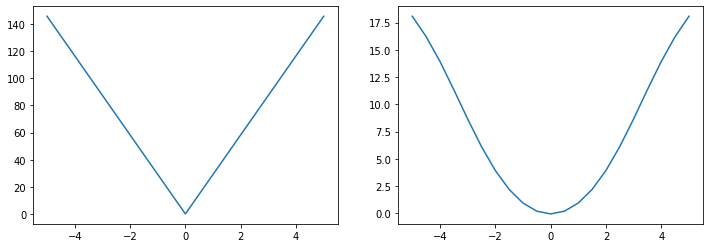

In [3]:
fig, ax = plt.subplots(ncols=2,figsize=[12,4])

ax[0].plot(mu_arr,L2)
ax[1].plot(mu_arr,W2)

In [4]:
#start with simple case of Gaussian passing over each other

m_points = sp.Model_Points(np.linspace(-5,5,100).reshape([100,1]))
post = gb.Gaussian_Mixture(np.array([0.7,0.3]),np.array([-2,2]).reshape([2,1]),np.array([1.5,0.6]).reshape([2,1,1]))

post_eval = sp.Evaluate_Mixture(post,m_points)

#now want to test each misfit for mean ranging from -5 to 5
L2 = np.zeros(21)
W2 = np.zeros(21)
mu_arr = np.linspace(-5,5,21)

k = 0
for mu in mu_arr:
    test_mix = gb.Gaussian_Mixture(np.array([1]),np.array([mu]).reshape([1,1]),np.array([1]).reshape([1,1,1]))
    test_eval = sp.Evaluate_Mixture(test_mix,m_points)
    
    s = np.log(post_eval) - np.log(test_eval)
    r = s - np.mean(s)
    L2[k] = np.linalg.norm(r)
    
    p = test_eval / np.sum(test_eval)
    q = post_eval / np.sum(post_eval)
    
    C = ot.dist(m_points.all,m_points.all)
    P, log = ot.bregman.sinkhorn_epsilon_scaling(p,q,C,0.01,log=True)
    
    W2[k] = np.inner(log['alpha'],p) + np.inner(log['beta'],q)
    k += 1

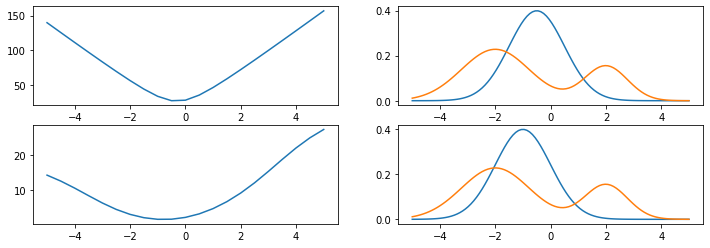

In [5]:
fig, ax = plt.subplots(nrows=2,ncols=2,figsize=[12,4])

ax[0,0].plot(mu_arr,L2)

best_L = np.argmin(L2)
best_mix = gb.Gaussian_Mixture(np.array([1]),np.array([mu_arr[best_L]]).reshape([1,1]),np.array([1]).reshape([1,1,1]))
best_eval = sp.Evaluate_Mixture(best_mix,m_points)

ax[0,1].plot(m_points.all,best_eval)
ax[0,1].plot(m_points.all,post_eval)


best_W = np.argmin(W2)
best_mix = gb.Gaussian_Mixture(np.array([1]),np.array([mu_arr[best_W]]).reshape([1,1]),np.array([1]).reshape([1,1,1]))
best_eval = sp.Evaluate_Mixture(best_mix,m_points)

ax[1,0].plot(mu_arr,W2)
ax[1,1].plot(m_points.all,best_eval)
ax[1,1].plot(m_points.all,post_eval)

In [8]:
#start with simple case of Gaussian passing over each other

m_points = sp.Model_Points(np.linspace(-5,5,100).reshape([100,1]))
post = gb.Gaussian_Mixture(np.array([0.8,0.2]),np.array([-2,2]).reshape([2,1]),np.array([1.5,0.6]).reshape([2,1,1]))

post_eval = sp.Evaluate_Mixture(post,m_points)

#now want to test each misfit for mean ranging from -5 to 5
L2 = np.zeros([21,21])
W2 = np.zeros([21,21])
mu_arr = np.linspace(-5,5,21)
sigma_arr = np.linspace(0.1,10,21)


for i in range(21):
    mu = mu_arr[i]
    print('Doing row ',i+1, ' of ',21)
    for j in range(21):
        sigma = sigma_arr[j]
        test_mix = gb.Gaussian_Mixture(np.array([1]),np.array([mu]).reshape([1,1]),np.array([sigma]).reshape([1,1,1]))
        test_eval = sp.Evaluate_Mixture(test_mix,m_points)

        s = np.log(post_eval) - np.log(test_eval)
        r = s - np.mean(s)
        L2[i,j] = np.linalg.norm(r)

        p = test_eval / np.sum(test_eval)
        q = post_eval / np.sum(post_eval)

        C = ot.dist(m_points.all,m_points.all)
        P, log = ot.bregman.sinkhorn_epsilon_scaling(p,q,C,0.01,log=True)

        W2[i,j] = np.inner(log['alpha'],p) + np.inner(log['beta'],q)
    
print('Done!')

Doing row  1  of  21
Doing row  2  of  21
Doing row  3  of  21
Doing row  4  of  21
Doing row  5  of  21
Doing row  6  of  21
Doing row  7  of  21
Doing row  8  of  21
Doing row  9  of  21
Doing row  10  of  21
Doing row  11  of  21
Doing row  12  of  21
Doing row  13  of  21
Doing row  14  of  21
Doing row  15  of  21
Doing row  16  of  21
Doing row  17  of  21
Doing row  18  of  21
Doing row  19  of  21
Doing row  20  of  21
Doing row  21  of  21


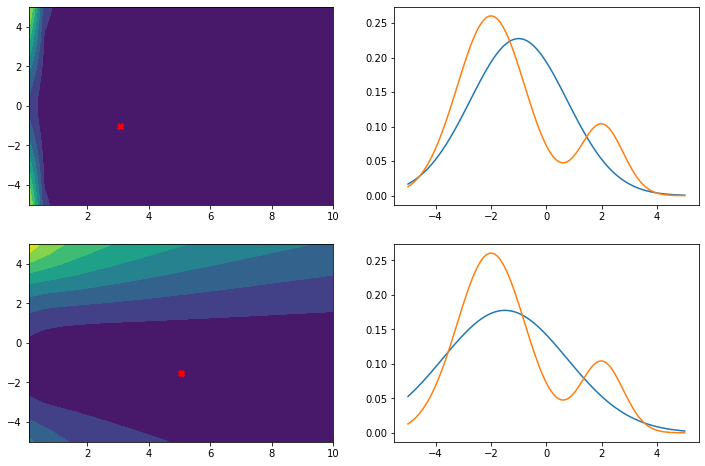

In [9]:
plot_dom = sp.Model_Points(np.linspace(-5,5,100).reshape([100,1]))
post_eval = sp.Evaluate_Mixture(post,plot_dom)

fig, ax = plt.subplots(nrows=2,ncols=2,figsize=[12,8])


best_mu = np.argmin(L2) // 21
best_sigma = np.argmin(L2) % 21
best_mix = gb.Gaussian_Mixture(np.array([1]),np.array([mu_arr[best_mu]]).reshape([1,1]),
                               np.array([sigma_arr[best_sigma]]).reshape([1,1,1]))
best_eval = sp.Evaluate_Mixture(best_mix,plot_dom)

ax[0,1].plot(plot_dom.all,best_eval)
ax[0,1].plot(plot_dom.all,post_eval)

ax[0,0].contourf(sigma_arr,mu_arr,L2)
ax[0,0].plot(sigma_arr[best_sigma],mu_arr[best_mu],marker='X',color='red')

best_mu = np.argmin(W2) // 21
best_sigma = np.argmin(W2) % 21
best_mix = gb.Gaussian_Mixture(np.array([1]),np.array([mu_arr[best_mu]]).reshape([1,1]),
                               np.array([sigma_arr[best_sigma]]).reshape([1,1,1]))
best_eval = sp.Evaluate_Mixture(best_mix,plot_dom)

ax[1,1].plot(plot_dom.all,best_eval)
ax[1,1].plot(plot_dom.all,post_eval)

ax[1,0].contourf(sigma_arr,mu_arr,W2)
ax[1,0].plot(sigma_arr[best_sigma],mu_arr[best_mu],marker='X',color='red')


In [27]:
post = gb.Gaussian_Mixture(np.array([0.8,0.2]),np.array([-2,2]).reshape([2,1]),np.array([1.5,0.6]).reshape([2,1,1]))
m_points = sp.Sample_Mixture(post,100)
post_eval = sp.Evaluate_Mixture(post,m_points)

#now want to test each misfit for mean ranging from -5 to 5
L2 = np.zeros([21,21])
W2 = np.zeros([21,21])
mu_arr = np.linspace(-5,5,21)
sigma_arr = np.linspace(0.1,10,21)


for i in range(21):
    mu = mu_arr[i]
    print('Doing row ',i+1, ' of ',21)
    for j in range(21):
        sigma = sigma_arr[j]
        test_mix = gb.Gaussian_Mixture(np.array([1]),np.array([mu]).reshape([1,1]),np.array([sigma]).reshape([1,1,1]))
        test_eval = sp.Evaluate_Mixture(test_mix,m_points)

        s = np.log(post_eval) - np.log(test_eval)
        r = s - np.mean(s)
        L2[i,j] = np.linalg.norm(r)

        p = test_eval / post_eval
        p /= np.sum(p)
        
        q = post_eval / post_eval
        q /= np.sum(q)

        C = ot.dist(m_points.all,m_points.all)
        P, log = ot.bregman.sinkhorn_epsilon_scaling(p,q,C,0.01,log=True)

        W2[i,j] = np.inner(log['alpha'],p) + np.inner(log['beta'],q)
    
print('Done!')

Doing row  1  of  21
Doing row  2  of  21
Doing row  3  of  21
Doing row  4  of  21
Doing row  5  of  21
Doing row  6  of  21
Doing row  7  of  21
Doing row  8  of  21
Doing row  9  of  21
Doing row  10  of  21
Doing row  11  of  21
Doing row  12  of  21
Doing row  13  of  21
Doing row  14  of  21
Doing row  15  of  21
Doing row  16  of  21
Doing row  17  of  21
Doing row  18  of  21
Doing row  19  of  21
Doing row  20  of  21
Doing row  21  of  21
Done!


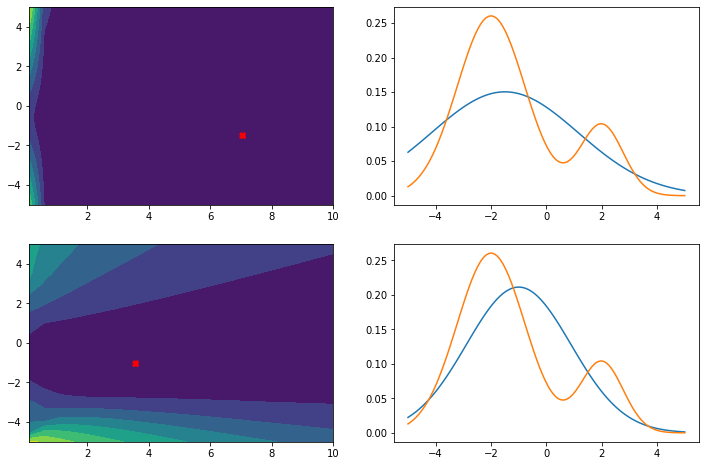

In [28]:
plot_dom = sp.Model_Points(np.linspace(-5,5,100).reshape([100,1]))
post_eval = sp.Evaluate_Mixture(post,plot_dom)

fig, ax = plt.subplots(nrows=2,ncols=2,figsize=[12,8])


best_mu = np.argmin(L2) // 21
best_sigma = np.argmin(L2) % 21
best_mix = gb.Gaussian_Mixture(np.array([1]),np.array([mu_arr[best_mu]]).reshape([1,1]),
                               np.array([sigma_arr[best_sigma]]).reshape([1,1,1]))
best_eval = sp.Evaluate_Mixture(best_mix,plot_dom)

ax[0,1].plot(plot_dom.all,best_eval)
ax[0,1].plot(plot_dom.all,post_eval)

ax[0,0].contourf(sigma_arr,mu_arr,L2)
ax[0,0].plot(sigma_arr[best_sigma],mu_arr[best_mu],marker='X',color='red')

best_mu = np.argmin(W2) // 21
best_sigma = np.argmin(W2) % 21
best_mix = gb.Gaussian_Mixture(np.array([1]),np.array([mu_arr[best_mu]]).reshape([1,1]),
                               np.array([sigma_arr[best_sigma]]).reshape([1,1,1]))
best_eval = sp.Evaluate_Mixture(best_mix,plot_dom)

ax[1,1].plot(plot_dom.all,best_eval)
ax[1,1].plot(plot_dom.all,post_eval)

ax[1,0].contourf(sigma_arr,mu_arr,W2)
ax[1,0].plot(sigma_arr[best_sigma],mu_arr[best_mu],marker='X',color='red')

In [32]:
#what I really want to test is fitting with a more complex mixture
post = gb.Gaussian_Mixture(np.array([0.4,0.6]),np.array([-2,2]).reshape([2,1]),np.array([1.5,0.6]).reshape([2,1,1]))
m_points = sp.Sample_Mixture(post,100)
post_eval = sp.Evaluate_Mixture(post,m_points)

#now want to test each misfit for mean ranging from -5 to 5
L2 = np.zeros([21,21,21,21])
mu_arr = np.linspace(-5,5,21)
sigma_arr = np.linspace(0.1,10,21)


for i in range(21):
    mu1 = mu_arr[i]
    for j in range(21):
        sigma1 = sigma_arr[j]
        for k in range(21):
            mu2 = mu_arr[k]
            for l in range(21):
                sigma2 = sigma_arr[l]

                test_mix = gb.Gaussian_Mixture(np.array([0.4,0.6]),
                                               np.array([mu1,mu2]).reshape([2,1]),
                                               np.array([sigma1,sigma2]).reshape([2,1,1]))
                
                test_eval = sp.Evaluate_Mixture(test_mix,m_points)

                s = np.log(post_eval) - np.log(test_eval)
                r = s - np.mean(s)
                L2[i,j,k,l] = np.linalg.norm(r)


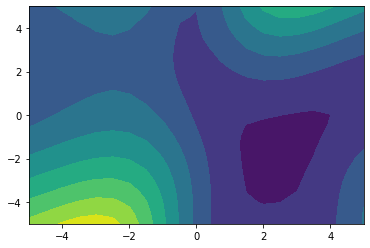

In [54]:
#now want to look at some cross sections of this and see if there are any local minima

plt.contourf(mu_arr,mu_arr,L2[:,15,:,4])

In [37]:
#now do Wasserstein for one of these cross sections to see if we get any inprovement

j = 10
l = 3

sigma1 = sigma_arr[j]
sigma2 = sigma_arr[l]
W2 = np.zeros([21,21])

for i in range(21):
    mu1 = mu_arr[i]
    for k in range(21):
        mu2 = mu_arr[k]
        
        test_mix = gb.Gaussian_Mixture(np.array([0.4,0.6]),
                                               np.array([mu1,mu2]).reshape([2,1]),
                                               np.array([sigma1,sigma2]).reshape([2,1,1]))
                
        test_eval = sp.Evaluate_Mixture(test_mix,m_points)
        p = test_eval / post_eval
        p /= np.sum(p)
        
        q = post_eval / post_eval
        q /= np.sum(q)

        C = ot.dist(m_points.all,m_points.all)
        P, log = ot.bregman.sinkhorn_epsilon_scaling(p,q,C,0.01,log=True)

        W2[i,k] = np.inner(log['alpha'],p) + np.inner(log['beta'],q)

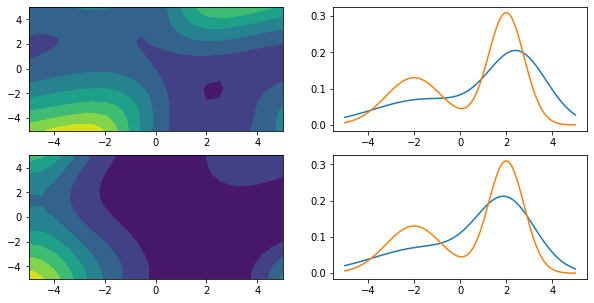

In [58]:
fig, ax = plt.subplots(nrows=2,ncols=2,figsize=[10,5])
ax[0,0].contourf(mu_arr,mu_arr,L2[:,j,:,l])
ax[1,0].contourf(mu_arr,mu_arr,W2)

plot_dom = sp.Model_Points(np.linspace(-5,5,100).reshape([100,1]))
post_eval = sp.Evaluate_Mixture(post,plot_dom)


best_mu1 = np.argmin(L2[:,j,:,l]) // 21
best_mu2 = np.argmin(L2[:,j,:,l]) % 21
best_mix = gb.Gaussian_Mixture(np.array([0.4,0.6]),np.array([mu_arr[best_mu1],mu_arr[best_mu2]]).reshape([2,1]),
                               np.array([sigma_arr[j],sigma_arr[l]]).reshape([2,1,1]))

best_eval = sp.Evaluate_Mixture(best_mix,plot_dom)

ax[0,1].plot(plot_dom.all,best_eval)
ax[0,1].plot(plot_dom.all,post_eval)



best_mu1 = np.argmin(W2) // 21
best_mu2 = np.argmin(W2) % 21
best_mix = gb.Gaussian_Mixture(np.array([0.4,0.6]),np.array([mu_arr[best_mu1],mu_arr[best_mu2]]).reshape([2,1]),
                               np.array([sigma_arr[j],sigma_arr[l]]).reshape([2,1,1]))

best_eval = sp.Evaluate_Mixture(best_mix,plot_dom)

ax[1,1].plot(plot_dom.all,best_eval)
ax[1,1].plot(plot_dom.all,post_eval)

